1. Use the IRIS dataset, implement the SVM classifier in python (make use of scikit-learn library), to do the
following.
a. Apply the kernel functions such as linear, polynomial, Radial basis functions and Sigmoid.
b. Plot the scatter plot of the input features.
c. Plot the decision boundary.

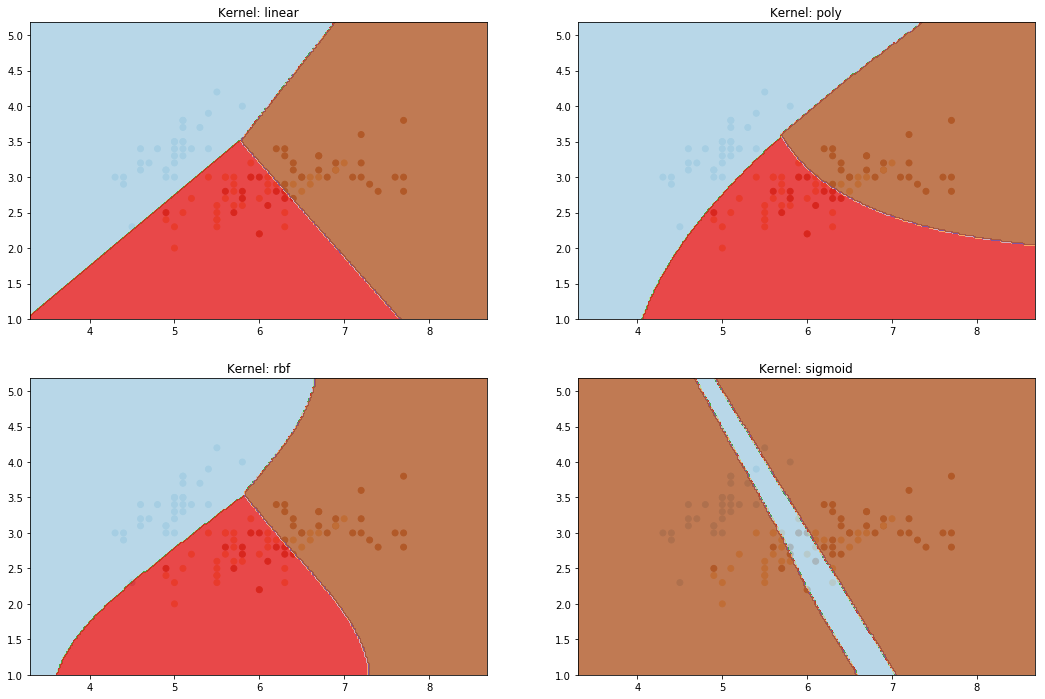

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for visualization
y = iris.target

# Split the dataset into a training and testing set (you can adjust the test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM models with different kernel functions
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = [SVC(kernel=kernel) for kernel in kernels]

# Train the models and create scatter plots and decision boundaries
plt.figure(figsize=(18, 12))
for i, model in enumerate(models):
    model.fit(X_train, y_train)

    # Create a mesh to plot the decision boundary
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create scatter plot
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.title(f'Kernel: {kernels[i]}')

plt.show()
